# Significance plot
1. Create the DataFrame for 36 fb^{-1} and 80 fb^{-1}.
2. Making significance plot

In [35]:
# Significance for 36 fb^{-1}
n2n1_36=[5.157434981,4.403347783,3.821219392,3.230511682,2.734713483,2.400803138,2.011578189]
n2c1p_36=[3.756499054,3.481049847,3.105884696,2.524361715,2.376125301,2.061440306,1.793648225]
n2c1m_36=[2.437323256,2.053550821,1.888783288,1.659679624,1.36937174,1.149351139,1.046530293]
c1c1_36=[2.810770929,1.606326707,1.486521823,1.164456312,1.053193518,0.8077737138,0.6529398224]

# Significance for 80 fb^{-1}
n2n1_80=[7.688250138,6.564123314,5.696337545,4.815762482,4.076670164,3.578906012,2.998683714]
n2c1p_80=[5.599858162,5.189242727,4.629979541,3.763096263,3.542118464,3.07301377,2.673812906]
n2c1m_80=[3.633346989,3.061252821,2.815631885,2.474104306,2.041338865,1.713351518,1.560075251]
c1c1_80=[4.19004991,2.394570474,2.215975898,1.73586898,1.570008199,1.204157956,0.9733452188]

In [36]:
import pandas as pd

# Create DataFrames for significance
df_36 = pd.DataFrame({"N2N1":n2n1_36, "N2C1p":n2c1p_36, "N2C1m":n2c1m_36, "C1C1":c1c1_36}, index=[90,100,110,120,130,140,150])
df_36.index.name = "mu"
df_80 = pd.DataFrame({"N2N1":n2n1_80, "N2C1p":n2c1p_80, "N2C1m":n2c1m_80, "C1C1":c1c1_80}, index=[90,100,110,120,130,140,150])
df_80.index.name = "mu"

In [37]:
df_36

,N2N1,N2C1p,N2C1m,C1C1
mu,,,,
90,5.157435,3.756499,2.437323,2.810771
100,4.403348,3.481050,2.053551,1.606327
110,3.821219,3.105885,1.888783,1.486522
120,3.230512,2.524362,1.659680,1.164456
130,2.734713,2.376125,1.369372,1.053194
140,2.400803,2.061440,1.149351,0.807774
150,2.011578,1.793648,1.046530,0.652940


In [38]:
df_80

,N2N1,N2C1p,N2C1m,C1C1
mu,,,,
90,7.688250,5.599858,3.633347,4.190050
100,6.564123,5.189243,3.061253,2.394570
110,5.696338,4.629980,2.815632,2.215976
120,4.815762,3.763096,2.474104,1.735869
130,4.076670,3.542118,2.041339,1.570008
140,3.578906,3.073014,1.713352,1.204158
150,2.998684,2.673813,1.560075,0.973345


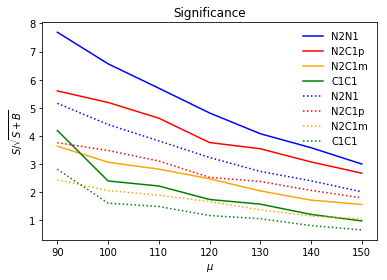

In [39]:
import matplotlib.pyplot as plt

plt.plot(df_80["N2N1"], color='blue',label="N2N1")
plt.plot(df_80["N2C1p"], color='red', label="N2C1p")
plt.plot(df_80["N2C1m"], color='orange', label="N2C1m")
plt.plot(df_80["C1C1"], color='green', label="C1C1")

plt.plot(df_36["N2N1"], 'b:')
plt.plot(df_36["N2C1p"], 'r:')
plt.plot(df_36["N2C1m"], color='orange', linestyle=":")
plt.plot(df_36["C1C1"], 'g:')

# plt.xlim([90,150])
# plt.ylim([0,10])
plt.xlabel("$\mu$")
plt.ylabel("$S/\sqrt{S+B}$")
plt.title("Significance")
plt.legend(frameon=False)

plt.show()

# Siginficance use the BinomialExpZ()
1. Combine 4 channels
2. Use RooStats::NumberCountingUtils::BinomialExpZ(n_signal_weighted, n_background_weighted, bkg_uncertainty) to calculate the significance
   * See https://root.cern.ch/root/html/tutorials/roostats/rs_numbercountingutils.C.html
   * Use 30% uncertainties
3. Making new significance plot.

In [40]:
# N_{sig} for 80 fb^{-1}
Nsig_n2n1 = [117.3262842, 95.32164965, 79.5707904, 64.64648411, 52.91337806, 45.40577222, 37.0429729]
Nsig_n2c1p = [77.88431923, 70.84870222, 61.63018236, 48.14749729, 44.86324872, 38.09135506, 32.53869359]
Nsig_n2c1m = [46.21172967, 37.92502892, 34.4894839, 29.83194276, 24.12595817, 19.94415583, 18.03131655]
Nsig_c1c1 = [54.66737606, 28.76701141, 26.40250014, 20.22737526, 18.15448487, 13.6895946, 10.94756465]

df_Nsig_80 = pd.DataFrame({"N2N1":Nsig_n2n1, "N2C1p":Nsig_n2c1p, "N2C1m":Nsig_n2c1m, "C1C1":Nsig_c1c1}, index=[90,100,110,120,130,140,150])
df_Nsig_80.index.name = "mu"
df_Nsig_80

,N2N1,N2C1p,N2C1m,C1C1
mu,,,,
90,117.326284,77.884319,46.211730,54.667376
100,95.321650,70.848702,37.925029,28.767011
110,79.570790,61.630182,34.489484,26.402500
120,64.646484,48.147497,29.831943,20.227375
130,52.913378,44.863249,24.125958,18.154485
140,45.405772,38.091355,19.944156,13.689595
150,37.042973,32.538694,18.031317,10.947565


In [41]:
df_Nsig_80['Sum'] = df_Nsig_80.sum(axis=1)
df_Nsig_80

,N2N1,N2C1p,N2C1m,C1C1,Sum
mu,,,,,
90,117.326284,77.884319,46.211730,54.667376,296.089709
100,95.321650,70.848702,37.925029,28.767011,232.862392
110,79.570790,61.630182,34.489484,26.402500,202.092957
120,64.646484,48.147497,29.831943,20.227375,162.853299
130,52.913378,44.863249,24.125958,18.154485,140.057070
140,45.405772,38.091355,19.944156,13.689595,117.130878
150,37.042973,32.538694,18.031317,10.947565,98.560548


In [42]:
Z_80 = [5.033257, 4.192522, 3.749761, 3.145388, 2.769967, 2.370947, 2.029468]
Z_36 = [4.841942, 4.026447, 3.597466, 3.012568, 2.649699, 2.264469, 1.935207]
df_sig = pd.DataFrame({"sig80":Z_80, "sig36":Z_36}, index=[90,100,110,120,130,140,150])
df_sig

,sig80,sig36
90,5.033257,4.841942
100,4.192522,4.026447
110,3.749761,3.597466
120,3.145388,3.012568
130,2.769967,2.649699
140,2.370947,2.264469
150,2.029468,1.935207


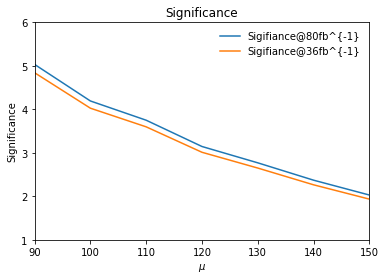

In [45]:
plt.plot(df_sig['sig80'], label='Sigifiance@80fb^{-1}')
plt.plot(df_sig['sig36'], label='Sigifiance@36fb^{-1}')
plt.xlim([90, 150])
plt.ylim([1, 6])
plt.xlabel('$\mu$')
plt.ylabel('Significance')
plt.legend(frameon=False)
plt.title('Significance')
plt.savefig("Figure2.pdf")